In [1]:
import pandas as pd

from geopy.geocoders import Nominatim

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data_ford_price.xlsx') 

# Обработка географических данных

По аналогии с датой и временем можно использовать информацию в столбцах, например, широту и долготу.

Давайте найдём конкретный адрес нулевого объекта, используя широту и долготу. Для этого нам понадобится библиотека geopy.

Создаём объект Nominatim и инициализируем API Nominatim с помощью параметра geoapiExercises.

In [3]:
geolocator = Nominatim(user_agent="geoapiExercises")

Объединим широту и долготу для поиска адреса нулевого объекта:

In [8]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

In [9]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

# Отрисовка карты

С помощью библиотек geopandas и shapely можно визуализировать географические данные. Это значит, что мы можем увидеть расположение наших объектов (автомобилей) на карте мира.

Установим данные библиотеки:

In [ ]:
#!pip install geopandas
#!pip install shapely

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

Отметим расположение объектов нашей выборки зелёным цветом.

/var/folders/71/mrtyv_5x63jbx4zk2kls4n3m0000gn/T/ipykernel_29144/1435503275.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


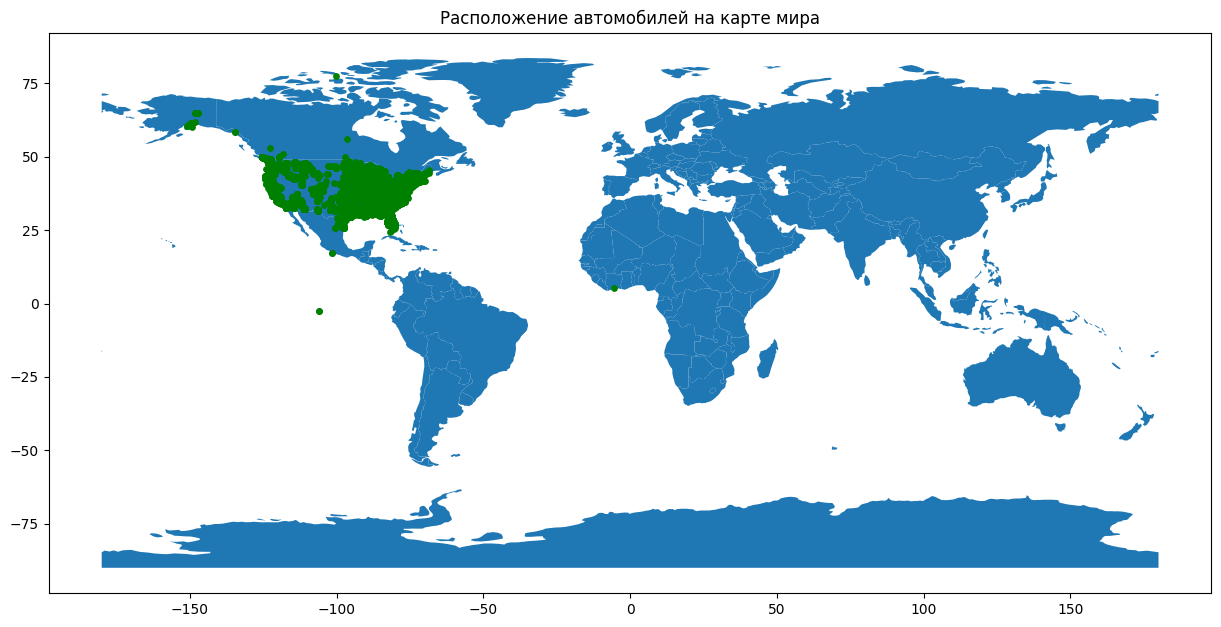

In [11]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

С помощью Plotly мы можем построить интерактивную карту и отследить изменение цены автомобиля в зависимости от его локации:

In [12]:
import plotly.express as px
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()